In [1]:
#import necessary packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc, plot_roc_curve, accuracy_score
from sklearn.metrics import log_loss,f1_score, matthews_corrcoef, classification_report, plot_precision_recall_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score,average_precision_score

In [2]:
X_train = pd.read_csv('data/Training_Data_Features.csv')
X_train = X_train.drop(['nameOrig', 'nameDest'], axis = 1)
X_test = pd.read_csv('data/Testing_Data_Features.csv')
X_test = X_test.drop(['nameOrig', 'nameDest'], axis = 1)
y_train = pd.read_csv('data/Training_Data_Labels.csv')
y_test = pd.read_csv('data/Testing_Data_Labels.csv')

In [3]:
y_train.shape

(1939286, 1)

__Logistic Regression Model__

In [4]:
lr = LogisticRegression()

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9982024321309843


In [5]:
y_pred = lr_model.predict(X_test)


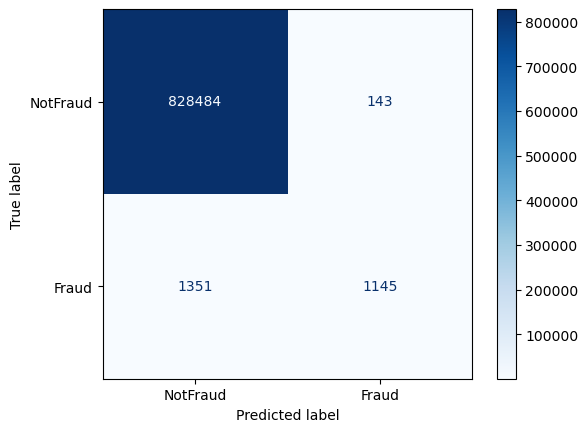

In [6]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.89      0.46      0.61      2496

    accuracy                           1.00    831123
   macro avg       0.94      0.73      0.80    831123
weighted avg       1.00      1.00      1.00    831123



we explore a resampling technique here using SMOTE. In our particular scenario, we oversample the minority class by synthetically generating additional samples.


In [8]:
from imblearn.over_sampling import SMOTE
import imblearn
from collections import Counter

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(y_train_res.value_counts())

print(y_train.value_counts())
print(y_test.value_counts())

isFraud
0          1933569
1          1933569
dtype: int64
isFraud
0          1933569
1             5717
dtype: int64
isFraud
0          828627
1            2496
dtype: int64


In [9]:

clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)

In [10]:

y_pred_sm = clf.predict(X_test)

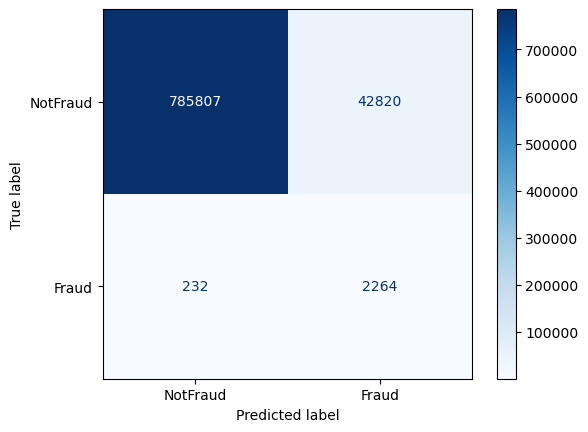

In [11]:
cm = confusion_matrix(y_test,y_pred_sm)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

In [12]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    828627
           1       0.05      0.91      0.10      2496

    accuracy                           0.95    831123
   macro avg       0.52      0.93      0.53    831123
weighted avg       1.00      0.95      0.97    831123



Random forest

In [13]:
rf_mod = RandomForestClassifier(random_state=42,n_jobs=-1)


In [14]:
rf_mod.fit(X_train_res,y_train_res)
y_pred_rf = rf_mod.predict(X_test)

In [15]:
rf_mod.score(X_train,y_train)


1.0

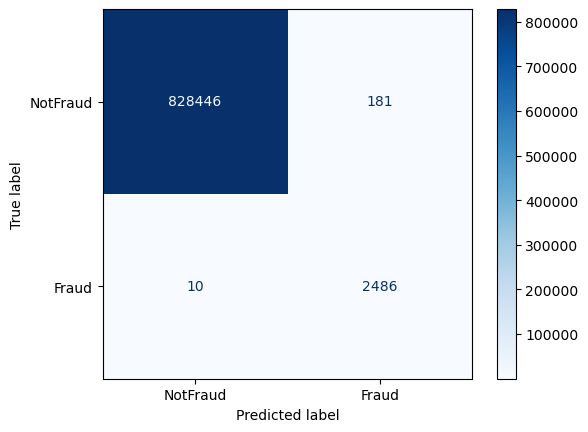

In [16]:
cm = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

In [17]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.93      1.00      0.96      2496

    accuracy                           1.00    831123
   macro avg       0.97      1.00      0.98    831123
weighted avg       1.00      1.00      1.00    831123



Performing OverSampling over minority class to see if results are different from SMOTE 

In [18]:
# Randomly over sample the minority class

sampling_strategy=0.5
ros = RandomOverSampler(sampling_strategy=0.5,random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))
print(sorted(Counter(y_train).items()))
print(y_train_ros.value_counts())

print(y_train.value_counts())

[('isFraud', 1)]
[('isFraud', 1)]
isFraud
0          1933569
1           966784
dtype: int64
isFraud
0          1933569
1             5717
dtype: int64


In [19]:
clf = LogisticRegression()
model_res = clf.fit(X_train_ros, y_train_ros)

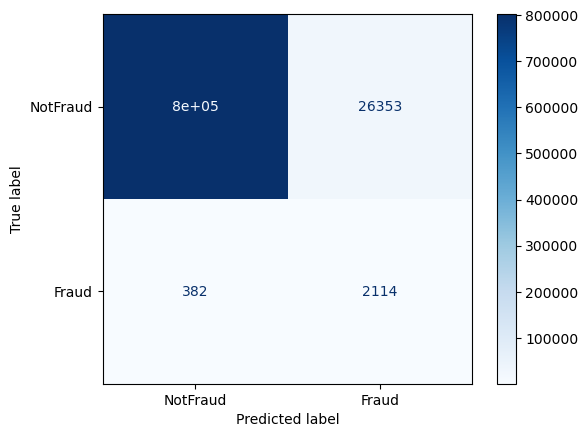

In [20]:
y_pred_ov = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred_ov)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

In [21]:
print(classification_report(y_test,y_pred_ov))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    828627
           1       0.07      0.85      0.14      2496

    accuracy                           0.97    831123
   macro avg       0.54      0.91      0.56    831123
weighted avg       1.00      0.97      0.98    831123



In [22]:
from xgboost import XGBClassifier
modelXGB = XGBClassifier(random_state=42)
modelXGB.fit(X_train_res,y_train_res)
y_XGB = modelXGB.predict(X_test)

In [23]:
print(classification_report(y_test, y_XGB))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.89      1.00      0.94      2496

    accuracy                           1.00    831123
   macro avg       0.94      1.00      0.97    831123
weighted avg       1.00      1.00      1.00    831123



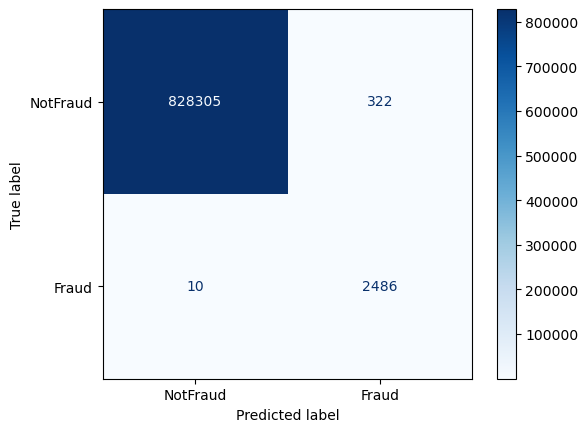

In [24]:

cm = confusion_matrix(y_test,y_XGB)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

In [25]:
pd.DataFrame(rf_mod.feature_importances_, index=X_train_res.columns).sort_values(by=0, ascending=False)

,0
origBalance_inacc,0.512294
destBalance_inacc,0.134198
newbalanceOrig,0.100885
step,0.077401
amount,0.070983
oldbalanceDest,0.054122
type_CASH_OUT,0.027910
type_TRANSFER,0.022206


Performing UnderSampling  to decrease sample size

In [26]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.8)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(X_rus.shape, y_rus.shape)
#print(pd.value_counts(y_rus))
print(y_train.value_counts())
print(y_rus.value_counts())

(12863, 8) (12863, 1)
isFraud
0          1933569
1             5717
dtype: int64
isFraud
0          7146
1          5717
dtype: int64


In [27]:
#Logistic Regression undersampling
clf_under = LogisticRegression()
model_res = clf_under.fit(X_rus, y_rus)

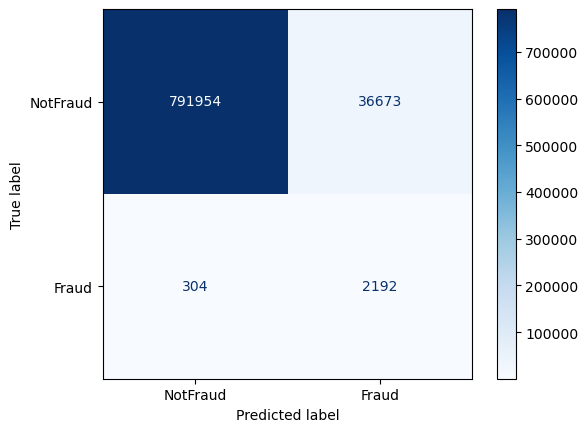

In [28]:
y_pred_log = clf_under.predict(X_test)
cm = confusion_matrix(y_test,y_pred_log)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

In [29]:
print(classification_report(y_test, y_pred_log))



              precision    recall  f1-score   support

           0       1.00      0.96      0.98    828627
           1       0.06      0.88      0.11      2496

    accuracy                           0.96    831123
   macro avg       0.53      0.92      0.54    831123
weighted avg       1.00      0.96      0.97    831123



In [30]:
Accuracy1 = accuracy_score(y_test, y_pred_log)
Precision1 = precision_score(y_test, y_pred_log)
Recall1 = recall_score(y_test, y_pred_log)
F1_1 = f1_score(y_test, y_pred_log)
roc_auc1 = roc_auc_score(y_test, y_pred_log)
avgp1 = average_precision_score(y_test, y_pred_log)


                       

In [31]:
#RandomForest for undersampling
rf_mod1 = RandomForestClassifier(random_state=42,n_jobs=-1)
rf_mod1.fit(X_rus,y_rus)
y_pred_rf1 = rf_mod1.predict(X_test)


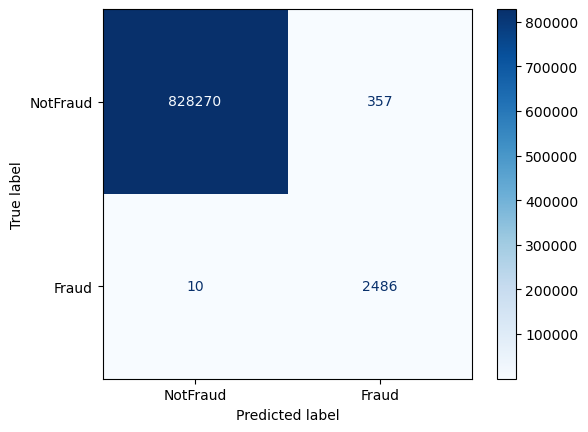

In [32]:
cm = confusion_matrix(y_test,y_pred_rf1)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

In [33]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.93      1.00      0.96      2496

    accuracy                           1.00    831123
   macro avg       0.97      1.00      0.98    831123
weighted avg       1.00      1.00      1.00    831123



In [34]:
n_est = [10,100,1000]
crtrn = ['gini','entropy']
mxdpth = [None,2,5,10,20]
param_grid = {'n_estimators':n_est,'criterion': crtrn, 'max_depth' : mxdpth}

rf_mod_gs = GridSearchCV(rf_mod1,param_grid,cv=5)

#fit data
rf_mod_gs.fit(X_rus,y_rus)
rf_mod_gs.best_score_

0.9982896921554678

In [35]:
rf_mod_gs.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 10}

In [36]:
rf_model_best = RandomForestClassifier(criterion= 'gini', max_depth= 5, n_estimators= 1000,random_state=42,n_jobs=-1)

In [37]:
rf_model_best.fit(X_rus,y_rus)
y_pred_best = rf_model_best.predict(X_test)
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.91      1.00      0.95      2496

    accuracy                           1.00    831123
   macro avg       0.96      1.00      0.98    831123
weighted avg       1.00      1.00      1.00    831123



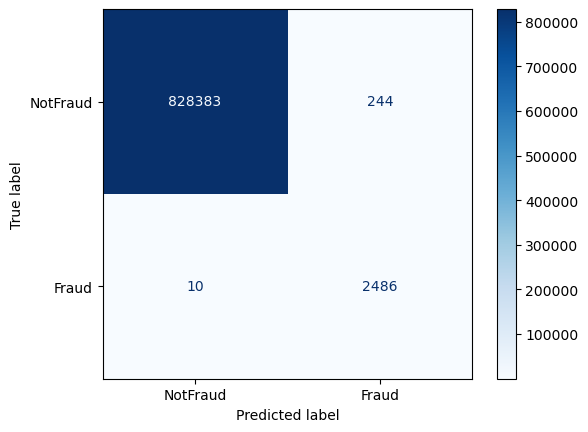

In [38]:
cm = confusion_matrix(y_test,y_pred_best)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

In [39]:
Accuracy2 = accuracy_score(y_test, y_pred_best)
Precision2 = precision_score(y_test, y_pred_best)
Recall2 = recall_score(y_test, y_pred_best)
F1_2 = f1_score(y_test, y_pred_best)
roc_auc2 = roc_auc_score(y_test, y_pred_best)
avgp2 = average_precision_score(y_test, y_pred_best)


In [40]:
pd.DataFrame(rf_model_best.feature_importances_, index=X_rus.columns).sort_values(by=0, ascending=False)

,0
origBalance_inacc,0.488676
destBalance_inacc,0.130345
oldbalanceDest,0.101533
step,0.081020
amount,0.078320
newbalanceOrig,0.063013
type_TRANSFER,0.028691
type_CASH_OUT,0.028401


In [41]:
#XGBoost for UnderSampling
modelXGB1 = XGBClassifier(random_state=42)
modelXGB1.fit(X_rus,y_rus)
y_XGB1 = modelXGB.predict(X_test)


In [42]:
#scores = cross_validate(rf_mod, X_train_res, y_train_res, scoring='f1', cv=5)
#print(scores.mean())

In [43]:
print(classification_report(y_test, y_XGB1))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.89      1.00      0.94      2496

    accuracy                           1.00    831123
   macro avg       0.94      1.00      0.97    831123
weighted avg       1.00      1.00      1.00    831123



In [44]:
#hyperparameter tuning of xgboost
param_XGB ={'max_depth': [1,7,1.5,6] ,
             'learning_rate': [.300000012,0.500000012] , 
             'n_estimators': [100,150,500], 
             'gamma': [0,2,.5,1], 
             'colsample_bytree': [1,.6],
             'subsample': [1,.6], 
             'reg_alpha': [0,1,.5],
             'reg_lambda': [1,.5]}


In [45]:
from sklearn.model_selection import RandomizedSearchCV
model_XGB_tuned = RandomizedSearchCV(modelXGB1, param_distributions=param_XGB, n_jobs=-1, verbose=1, scoring='accuracy',random_state=42)

In [46]:
XGB_Tuned = model_XGB_tuned.fit(X_rus, y_rus)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [47]:

XGB_Tuned.best_params_

{'subsample': 1,
 'reg_lambda': 0.5,
 'reg_alpha': 1,
 'n_estimators': 150,
 'max_depth': 7,
 'learning_rate': 0.500000012,
 'gamma': 2,
 'colsample_bytree': 0.6}

In [48]:
final_XGB = XGBClassifier(subsample= 1,
 reg_lambda= 0.5,
 reg_alpha = 1,
 n_estimators = 100,
 max_depth  = 6,
 learning_rate= 0.300000012,
 gamma= 2,
 colsample_bytree= 0.6)

In [49]:
final_XGB.fit(X_rus,y_rus)
y_tuned_XGB = final_XGB.predict(X_test)
#recall3 = recall_score(y_test, y_pred)

In [50]:
print(classification_report(y_test, y_tuned_XGB))
print(f"Train Score: {final_XGB.score(X_rus, y_rus)}\nTest Score: {final_XGB.score(X_test, y_test)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.93      1.00      0.96      2496

    accuracy                           1.00    831123
   macro avg       0.97      1.00      0.98    831123
weighted avg       1.00      1.00      1.00    831123

Train Score: 0.998445152763741
Test Score: 0.9997725968358474


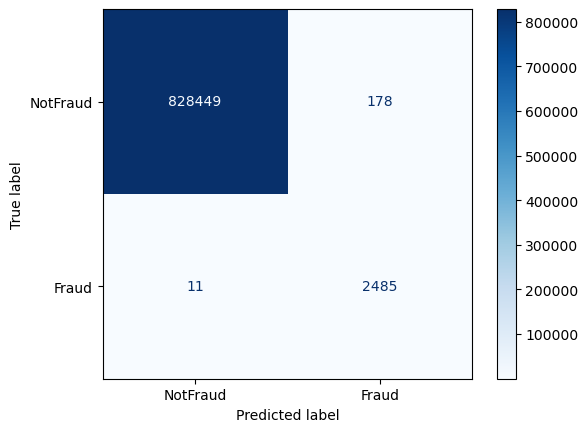

In [51]:
cm = confusion_matrix(y_test, y_tuned_XGB)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

In [52]:
Accuracy3 = accuracy_score(y_test, y_tuned_XGB)
Precision3 = precision_score(y_test, y_tuned_XGB)
Recall3 = recall_score(y_test, y_tuned_XGB)
F1_3 = f1_score(y_test, y_tuned_XGB)
roc_auc3 = roc_auc_score(y_test, y_tuned_XGB)
avgp3 = average_precision_score(y_test, y_tuned_XGB)



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

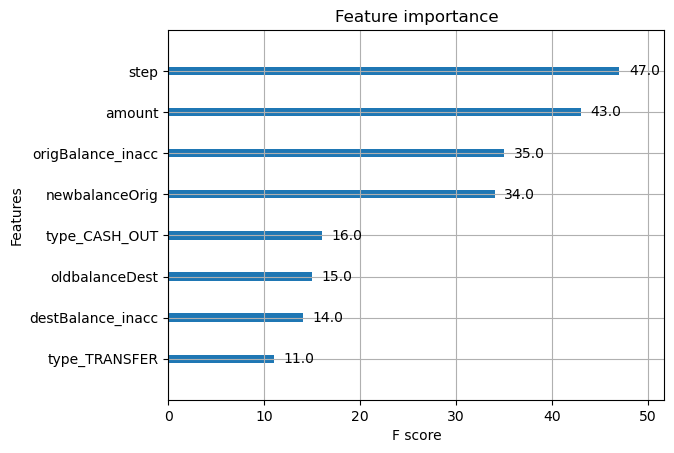

In [53]:
from xgboost import plot_importance

plot_importance(final_XGB)


__Model Evaluation__

Text(0.5, 1.0, 'ROC Curve XGBoost')

<Figure size 640x480 with 0 Axes>

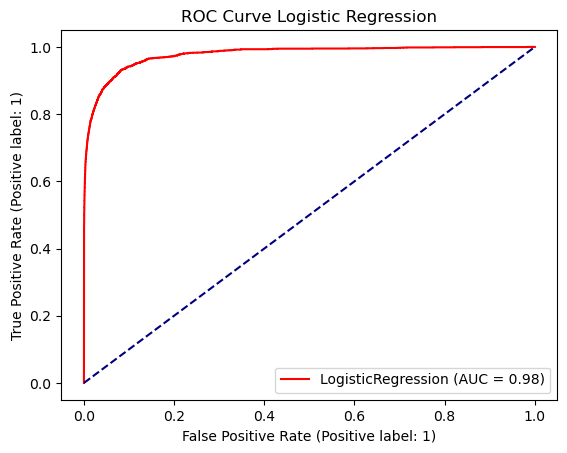

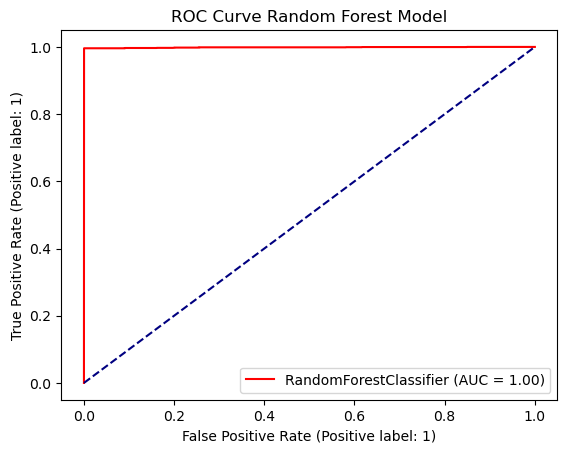

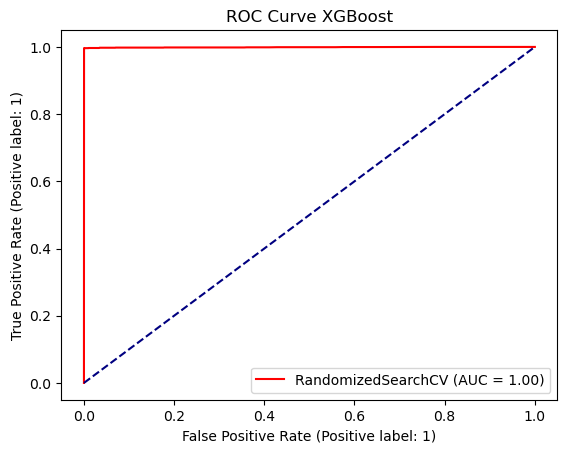

In [54]:
plt.figure(0).clf()
plot_roc_curve(clf_under, X_test, y_test,color="red")
plt.plot([0, 1], [0, 1], color="navy",linestyle="--")
plt.title("ROC Curve Logistic Regression")
plot_roc_curve(rf_model_best, X_test, y_test,color="red")
plt.plot([0, 1], [0, 1], color="navy",linestyle="--")
plt.title("ROC Curve Random Forest Model")
plot_roc_curve(XGB_Tuned, X_test, y_test,color="red")
plt.plot([0, 1], [0, 1], color="navy",linestyle="--")
plt.title("ROC Curve XGBoost")



In [55]:
p1,r1,_ = precision_recall_curve(y_test,clf_under.predict_proba(X_test)[:,1])
p2,r2,_ =precision_recall_curve(y_test,rf_model_best.predict_proba(X_test)[:,1])
p3,r3,_ =precision_recall_curve(y_test,XGB_Tuned.predict_proba(X_test)[:,1])

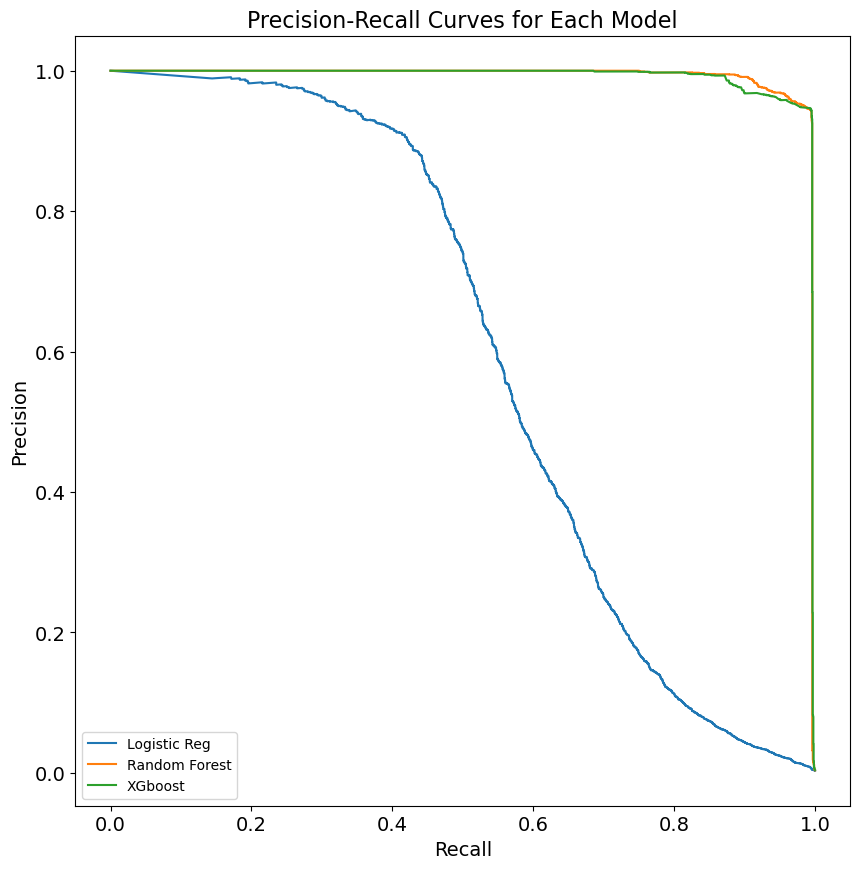

In [56]:
plt.figure(figsize=(10,10))
plt.plot(r1,p1,label='Logistic Reg')
plt.plot(r2,p2,label='Random Forest')
plt.plot(r3,p3,label='XGboost')
plt.xlabel("Recall",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.title("Precision-Recall Curves for Each Model",fontsize=16)
plt.legend()
plt.show()

In [57]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Random Forest', 'XG BOOST', ],
    'Accuracy'    : [Accuracy1,Accuracy2,Accuracy3],
    'Precision'   : [Precision1,Precision2,Precision3],
    'Recall'      : [Recall1, Recall2, Recall3],
    'F1_score'    : [F1_1,F1_2,F1_3],
    'AUC_ROC'     : [roc_auc1,roc_auc2,roc_auc3],
    'Precisionscore': [avgp1,avgp2,avgp3]
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC','Precisionscore'])
models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC,Precisionscore
2,XG BOOST,0.999773,0.933158,0.995593,0.963365,0.997689,0.929059
1,Random Forest,0.999694,0.910623,0.995994,0.951397,0.997850,0.906986
0,Logistic Regression,0.955510,0.056400,0.878205,0.105994,0.916974,0.049897


Summary :- 
First we created a base logistic model which gave a 99% accuracy score but precision and recall scores were comparatively less. As our data was imbalanced at that point we need to get better recall scores.

We appliedSMOTE for oversampling imbalanced classification datasets. SMOTE synthesized new examples for the minority class and made both classes of same size.
We ran Logistic regression model again on SMOTE resampled data and precision,recall and f1 scores values decreased.
Applied Random forest which gave good results 99% recall,93% precision and 96 f1 Score followed by XGBoost which gave 89% precision , 99% recall and 94 f1 score.

The dataset is very large so performing crossvalidation and hyperparameter tuning was taking too long to run.
We performed undersampling strategy by reducing the number of examples in the majority class in the transformed version of the training dataset.

Performed Logistic ,Random forest and XGBoost modelling again and logistic Regression model didn't performed well.
Random forest and XGBoost gave the same results from SMOTE oversampling.

Performed Hyperparameter Tuning and Crossvalidation on Random Forest and XGboost model.
Random forest gave almost same results while XGBoost used best parameters and gave results 99% accuracy,97% precison,99% recall and 98% f1 score.

XGBoost is the best classifier among the group, but whether it would be a good as real-time fraud detection model that may need to continously learn off of new data is another question.


